# Zones and Filtering

Introduction to filtering of image data.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
#import cv2
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from scipy.ndimage import convolve

## Get the data, and convert them to gray & uint8

C:\WinPython-64bit-3.5.1.3\python-3.5.1.amd64\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


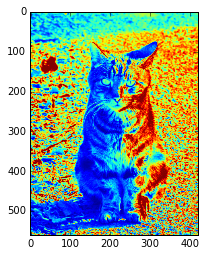

In [9]:
inDir = (r'D:\Users\thomas\Office\CSS_Coding\Python\Retina_Implants\data')
inFile = 'cat.jpg'
data = plt.imread(os.path.join(inDir,inFile))

data_g = rgb2gray(data)
data_u = img_as_ubyte(data_g)
plt.imshow(data_u)

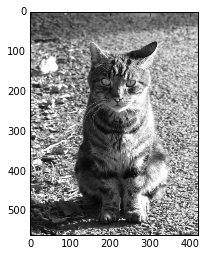

In [15]:
type(data_g[0,0])
plt.set_cmap('gray')
plt.imshow(data_u)
plt.show()

## Create 3 filters, and filter the data

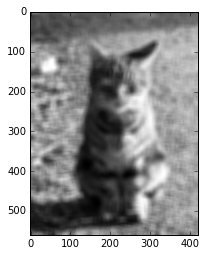

In [19]:
# Create the Filters
Filters = list()
Filters.append(np.array([[1.]]))
Filters.append(np.ones((7,7))/49.)
Filters.append(np.ones((15,15))/225.)

# Apply them
Filtered = list()
for ii in np.arange(3):
    #Filtered.append(cv2.filter2D((data_u), cv2.CV_32F, Filters[ii]))
    Filtered.append(convolve(data_u.astype(float), Filters[ii]))

# Show the last filtered output
plt.imshow(Filtered[2])

## Create 3 zones

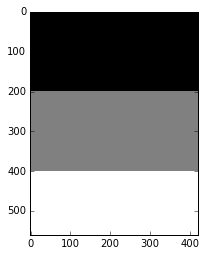

In [22]:
Zones = np.zeros(data_g.shape, dtype=np.uint8)
Zones[200:,:]=1
Zones[400:,:]=2
plt.imshow(Zones)

## Apply the corresponding filter to each zone

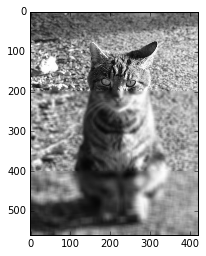

In [23]:
final = np.zeros(data_u.shape, dtype = np.uint8)
for ii in np.arange(3):
    final[Zones==ii] = Filtered[ii][Zones==ii]
plt.imshow(final)

<img src="data/images/Backward.png", align='left'> [ImgProc_1_Intro](ImgProc_1_Intro.ipynb)


    Author: Thomas Haslwanter
    Date: May 5, 2016
    Ver: 2.0

<img src="data/images/CCA_40.png">
*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.